<h1 style="text-align:center;">NLP With Hotel Review Part 2</h1>


## Problem statement
In this part, we will develop several machine learning models to correctly label the sentiment behind hotel reviews.

The preprocessed data from `Part 1` will be used here. The target column is the `rating` column which is a binary column denoting good ratings as 1 and bad ones as 0.

Let's begin with importing the appropriate libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time

Let's import the train and test datasets and take a look at them.

In [3]:
df_train = pd.read_csv("..\data\clean_train_dataframe.csv")

In [4]:
df_test = pd.read_csv("..\data\clean_test_dataframe.csv")

In [5]:
df_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape
print(f"The train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The train dataset has 12798 rows and 2744 columns


In [7]:
df_test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.shape
print(f"The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The test dataset has 4267 rows and 2744 columns


The input and target varialbes will be specified based on the target column: `rating`

In [9]:
# Input train and test sets
X_train = df_train.drop('rating', axis=1)
X_test = df_test.drop('rating', axis=1)

In [10]:
# Target train and test sets
y_train = df_train['rating']
y_test = df_test['rating']

## Modelling

### Employ a linear classifier on this dataset.
Fitting a logisitic regression model to this data with the solver set to lbfgs.

In [11]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [12]:
# Instantiate the the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=500)

# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled train and test data
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy score
print("Accuracy on the scaled train set:", accuracy_train)
print("Accuracy on the scaled test set:", accuracy_test)

Accuracy on the scaled train set: 0.8859196749492109
Accuracy on the scaled test set: 0.7328333723927818


As can be seen the accuracy on the test set is about 73% and based on the accuracy of the train set (88%), it seems that there is an overfitting issue.

### 20 words of positive and negative review using the regression coefficients


In [13]:
# Get the feature names (words)
feature_names = X_train.columns

# Extract the coefficients from the trained logistic regression model
coefficients = logreg.coef_[0]

# Create a dictionary with words and their corresponding coefficients
word_coefficients = dict(zip(feature_names, coefficients))

# Sort the words based on their coefficients (ascending order)
sorted_words = sorted(word_coefficients.items(), key=lambda x: x[1])

# Extract the top 20 words for positive reviews (highest coefficients)
positive_words = sorted_words[-20:]

# Extract the top 20 words for negative reviews (lowest coefficients)
negative_words = sorted_words[:20]

# Create dataframes for positive and negative words
df_pos = pd.DataFrame(positive_words, columns=['pos_words', 'pos_coeff']).sort_values('pos_coeff', ascending=False)
df_neg = pd.DataFrame(negative_words, columns=['neg_words', 'neg_coeff']).sort_values('neg_coeff', ascending=False)

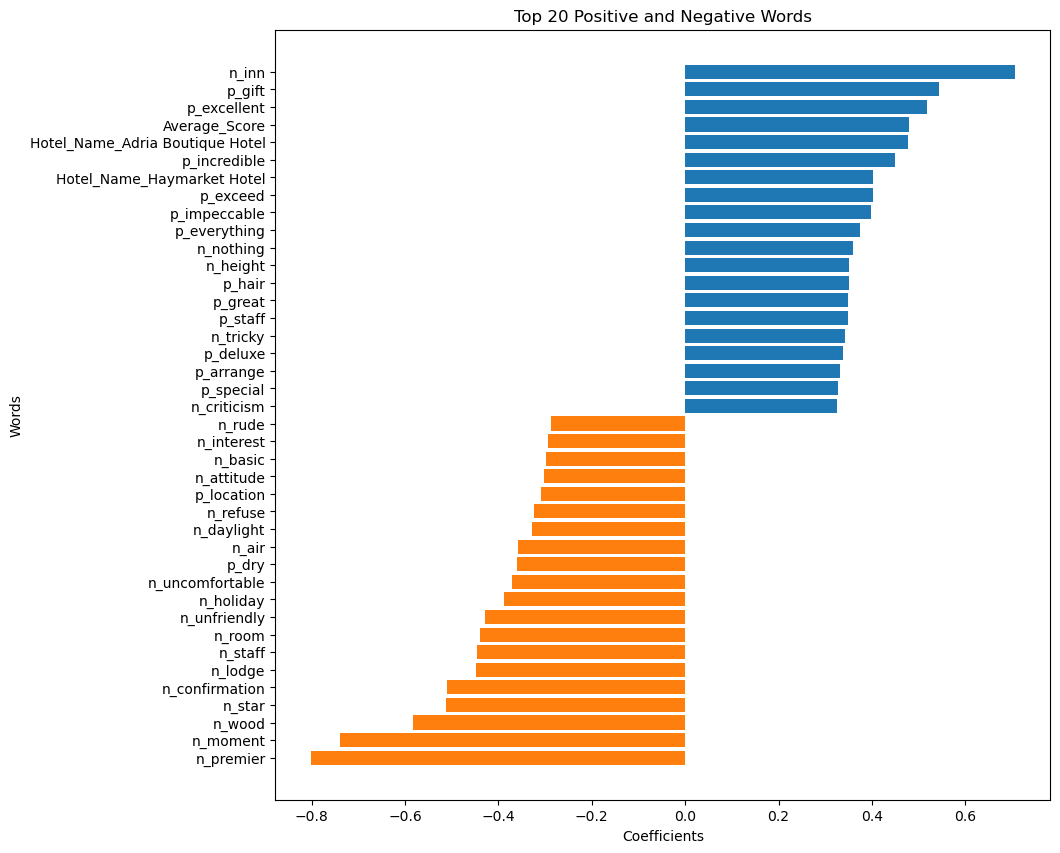

In [14]:
# Create a figure and plot the barh plot
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(df_pos['pos_words'].values, df_pos['pos_coeff'].values, align='center')
ax.barh(df_neg['neg_words'].values, df_neg['neg_coeff'].values, align='center')
ax.set_xlabel('Coefficients')
ax.set_ylabel('Words')
ax.set_title('Top 20 Positive and Negative Words')
ax.invert_yaxis()
plt.show()

### Reducing the dimensionality of the dataset using PCA
The relationship between the number of dimensions and run-time for a logistic regression will be studied.

In [15]:
# Instantiate & fit PCA model train data
my_PCA = PCA()
my_PCA.fit(X_train_scaled)

# transform data 
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [16]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (12798, 2743)
PCA Transformed: (12798, 2743)


In [17]:
# Pull out the explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.00763786, 0.01236506, 0.0145453 , ..., 1.        , 1.        ,
       1.        ])

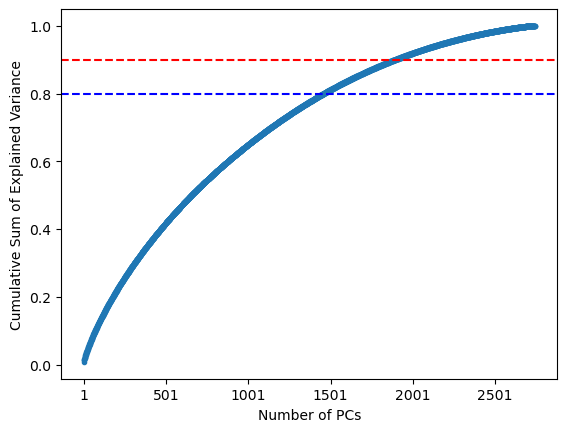

In [18]:
# Plot out the cumulative sum graph
plt.figure()
plt.plot(range(1,X_train.shape[1]+1), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.axhline(0.8, c='b', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,X_train.shape[1],500))
plt.show()

The standard 90% threshold for cummulative explained variance will lead to around 1800 PCs. Whereas, the 80% threshold will lead to lower dimensions around 1500 PCs. So in this problem, the 80% threshold will be selected.

In [19]:
# Instantiate & fit PCA model to the train data
my_PCA = PCA(n_components=0.8)
my_PCA.fit(X_train_scaled)

# transform data 
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [20]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (12798, 2743)
PCA Transformed: (12798, 1458)


In [21]:
# Create an instance of the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=500)

# Fit the model on the scaled training data
logreg.fit(X_train_PCA, y_train)

# Make predictions on the scaled test data
y_pred = logreg.predict(X_test_PCA)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy on the scaled test set:", accuracy)

Accuracy on the scaled test set: 0.7759550035153504


With reducing the number of features from 2743 to PCA with 1458 PCs, the test set accuracy has even increased to around 77% from 73%.

Now let's ee the effect of the number of PCs in the logistic regression training time.

In [22]:
num_dimensions = [10, 20, 50, 100, 200, 500, 1000, 1800, 2743]

runtimes = []

for n in num_dimensions:
    # Create an instance of PCA with the specified number of dimensions
    pca = PCA(n_components=n)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Transform the test data
    X_test_pca = pca.transform(X_test_scaled)

    start_time = time.time()

    # Create an instance of the logistic regression model
    logreg = LogisticRegression(solver='lbfgs', max_iter=500)

    # Fit the model on the training data
    logreg.fit(X_train_pca, y_train)

    end_time = time.time()

    runtime = end_time - start_time

    runtimes.append(runtime)

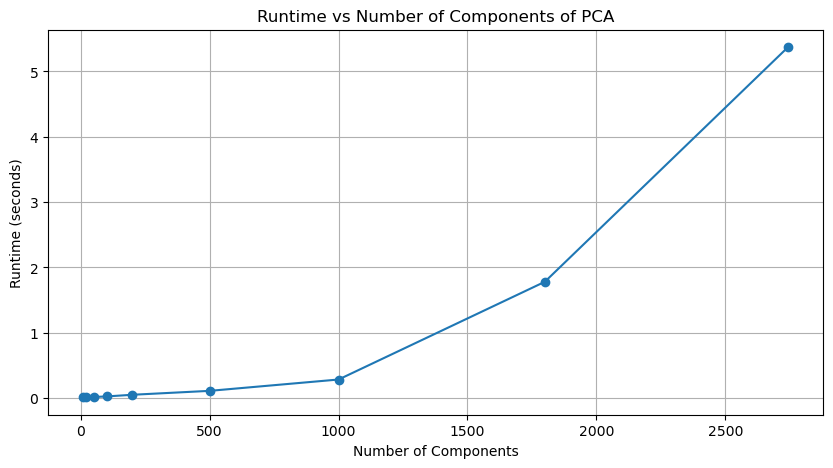

In [23]:
# Plot the runtime versus number of components
plt.figure(figsize=(10, 5))
plt.plot(num_dimensions, runtimes, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Components of PCA')
plt.grid(True)
plt.show()

As can be seen, with increasing the number of PCs, the runtime of the logistic regression increases. This is normal since as the PCs increases the number of feature for the logistic regression increases that leads to longer training times.

**Advantage**: Improved computational efficiency. It helps reducing the number of features in the datset and selects the most important ones that can describe the variance in the dataset. This leads to faster training time.

**Disadvantage**: Information loss. Although the goal of the dimensionality reduction is to keep the essential information while reducing the dimensinality, in this process some information will be lost. The loss of information can imapct the perfromance of the model if the discarded feature contribute to the predictive power of the model.

### Question 2. Employing a K-Nearest Neighbour (KNN) classifier on this dataset.

In [24]:
# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Fit the KNN model on the scaled training data with PCA
knn.fit(X_train_PCA, y_train)

# Make predictions on the scaled test data with PCA
y_pred_knn = knn.predict(X_test_PCA)

# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy score
print("Accuracy of the KNN model on the test set:", accuracy_knn)

Accuracy of the KNN model on the test set: 0.6346379189125849


### Relationship between the number of observations and run-time for KNN.
KNN is a computationally expensive model. The number of observations (data points) in the dataset will be reduced to see the relationship between the number of observations and run-time for KNN.

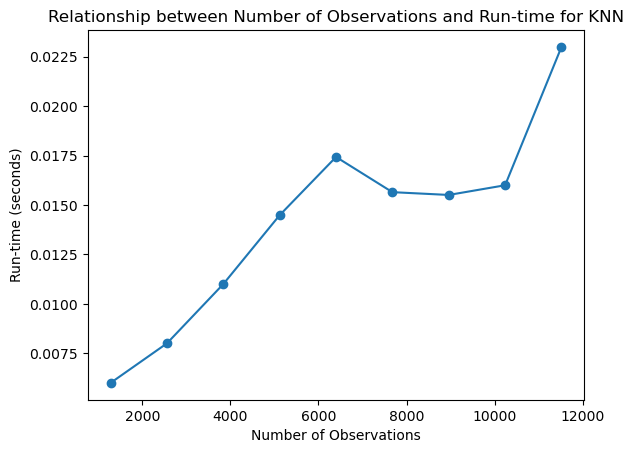

In [25]:
# Defien the sample fraction from 0.1 to 1
sample_fracs = np.arange(0.1, 1, 0.1)

num_observations = []
runtimes = []

# Loop over each sample fraction
for sample_frac in sample_fracs:
    
    # Calculate the number of observations based on the sample fraction
    num_samples = int(X_train_PCA.shape[0] * sample_frac)
    
    # Sample the data based on the calculated number of observations
    X_train_sampled = X_train_PCA[:num_samples]
    y_train_sampled = y_train[:num_samples]
    
    # Create an instance of the KNN classifier
    knn = KNeighborsClassifier()
    
    # Start the timer
    start_time = time.time()
    
    # Fit the KNN model on the sampled data
    knn.fit(X_train_sampled, y_train_sampled)
    
    # Calculate the run-time
    runtime = time.time() - start_time
    
    # Append the number of observations and run-time to the lists
    num_observations.append(num_samples)
    runtimes.append(runtime)

# Plot the relationship between the number of observations and run-time
plt.plot(num_observations, runtimes, '-o')
plt.xlabel('Number of Observations')
plt.ylabel('Run-time (seconds)')
plt.title('Relationship between Number of Observations and Run-time for KNN')
plt.show()

As the above plot confirms, KNN is a computationally expensive model which works based on the distances. With the increase of the number of samples the distance matrix calculated becomes more complex and run-time increases.

**Advantage**: 

Computational Efficiency: One of the main advantages of reducing the number of observations is improved computational efficiency. With a smaller dataset, the computational requirements of various algorithms and analyses can be significantly reduced. This can result in faster processing times, allowing for quicker model training and evaluation.

**Disadvantage**:

Information Loss: One downside of reducing the number of observations is the potential loss of important information. Each observation in a dataset provides valuable insights about the overall picture. By removing or reducing the number of observations, we might miss out on important patterns or outliers that could affect the accuracy and reliability of our models or analyses.

### Optimal value for K in the KNN

In [26]:
X_train_PCA_1, X_validation_PCA_1, y_train_1, y_validation_1 = \
    train_test_split(X_train_PCA, y_train, test_size = 0.3, stratify=y_train,random_state=1)

In [27]:
k_values = list(range(1, 50, 2))
train_scores = []
validation_scores = []

for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_PCA_1, y_train_1)
    
    # Evaluate
    train_scores.append(knn.score(X_train_PCA_1, y_train_1))
    validation_scores.append(knn.score(X_validation_PCA_1, y_validation_1))


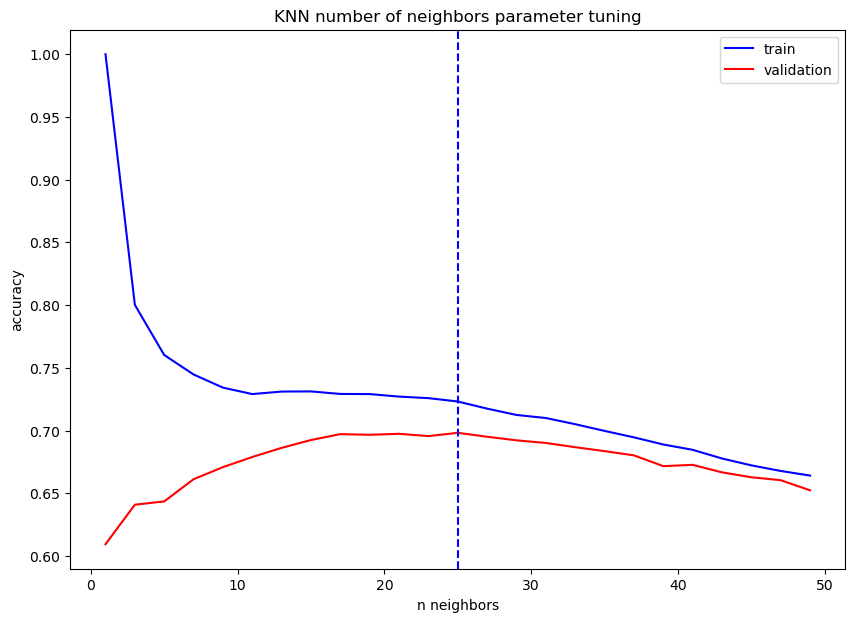

In [28]:
# Visualize our scores
plt.figure(figsize=(10, 7))
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.title("KNN number of neighbors parameter tuning")
plt.axvline(25, c='b', linestyle='--')
plt.legend()
plt.show()

In [29]:
df_scores = pd.DataFrame({'K': k_values, 'Train Score': train_scores, 'Validation Score': validation_scores})
df_scores

,K,Train Score,Validation Score
0,1,1.000000,0.609375
1,3,0.800179,0.640885
2,5,0.760214,0.643490
3,7,0.744697,0.661198
4,9,0.734204,0.670833
5,11,0.729069,0.678906
6,13,0.731078,0.686198
7,15,0.731190,0.692448
8,17,0.729181,0.697135
9,19,0.729069,0.696615


Based on the plot above and the results, it seems that n_neighbors=25 is the best parameter. The plot starts with a huge overfitting and then at the higher number of neighbors, it seems that it goes towards underfitting.

Let's see the performance of the model with n_neighbors=25.

In [30]:
# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=25)

# Fit the KNN model on the scaled training data with PCA
knn.fit(X_train_PCA, y_train)

# Make predictions on the scaled test data with PCA
y_pred_knn = knn.predict(X_test_PCA)

# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy score
print("Accuracy of the KNN model on the test set:", accuracy_knn)

Accuracy of the KNN model on the test set: 0.6871338176704945


The test accuracy has increased from 63% to 68%.

It is worth mentioning that splitting the data into train and validation sets after vectorization can introduce data leakage. This means that information from the validation set can unintentionally influence the training process, leading to overly optimistic performance estimates and potentially misleading results. To avoid this issue, it's important to perform vectorization separately on the training and validation sets, ensuring that the model is evaluated on truly unseen data.

### Employing a Decision Tree classifier on this dataset

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
    
# Evaluate
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"train score:{train_score} \n test score: {test_score}")

train score:1.0 
 test score: 0.696273728614952


With default values, it is evident that there is an overfitting issue with a huge gap between test and train accuracy scores.

### Optimal value for the maximum depth of the decision tree

In [32]:
# Creating sample from dataset
X_sample, X_remainder, y_sample, y_remainder = \
    train_test_split(X_train, y_train, test_size = 0.7, stratify=y_train,random_state=1)

In [33]:
# Creating train and validation sets from sample data
X_train_dt, X_validation_dt, y_train_dt, y_validation_dt = \
    train_test_split(X_sample, y_sample, test_size = 0.3, stratify=y_sample,random_state=1)

In [34]:
depths = list(range(1, int(np.sqrt(len(X_train_dt)))))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train_dt, y_train_dt)
    
    # Evaluate
    train_scores.append(dt.score(X_train_dt, y_train_dt))
    validation_scores.append(dt.score(X_validation_dt, y_validation_dt))   


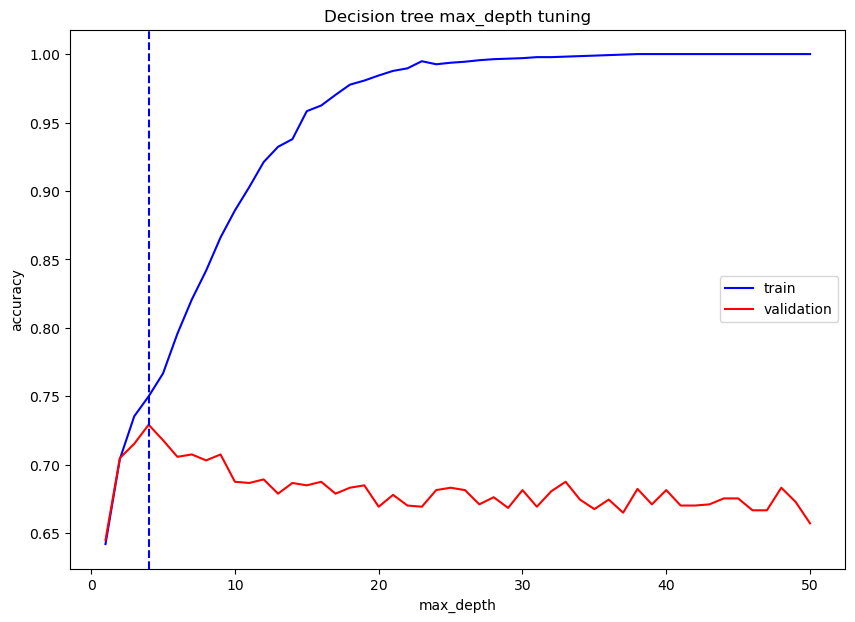

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")
plt.axvline(4, c='b', linestyle='--')
plt.legend()
plt.show()

In [36]:
df_scores_dt = pd.DataFrame({'max_depth': depths, 'Train Score': train_scores, 'Validation Score': validation_scores})

From the table and figure above, it can be identified that the max_depth of 4 is the best hyperparameter of the decision tree.

Let's try the DT model again:

In [37]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
    
# Evaluate
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"train score:{train_score} \n test score: {test_score}")

train score:0.7389435849351461 
 test score: 0.734239512538083


The performance of the model has increased to 73% from 70%. Also the overfitting issue has been resolved.

**Advantages**:

Decision trees have the advantage of being able to handle both categorical and numerical features without preprocessing, while KNN requires additional steps like feature scaling and encoding. Additionally, decision trees can capture feature interactions, allowing them to identify complex relationships, whereas KNN does not explicitly model these interactions.

**Weaknesses**:

Decision trees can become difficult to interpret when they have many levels of splitting, making deep trees less interpretable compared to KNN. Additionally, decision trees can be prone to overfitting if their complexity is not properly controlled, leading to poor performance on unseen data. Regularization techniques such as pruning or setting constraints on the tree's depth can help address this issue. In contrast, KNN does not face these challenges as it does not have an explicit tree structure.

### Why using a validation set?

The purpose of the validation set is to assess the performance of the model during training phase and hyperparameter tuning. It is different from test set since the test set is separated from the begining and the optimal model will be evaluated on that once the training phase is finished. But for the validation set, the hyperparamet of the model will be changed and the perfromance of the model will be evaluated on the validation set. based on this performance the hyperparameters will be tuned without manipulating the test set. This helps the test set to be independent and unseen.



### 5-fold cross validation

This will be done using the sample set for the computational efficiency.

In [42]:
# Create placeholders for all three steps
estimators = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=0.8)), 
    ('model', LogisticRegression(solver='liblinear', max_iter=500))
]

my_pipe = Pipeline(estimators)

In [43]:
param_grid = [
    {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2']
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_sample, y_sample)

In [44]:
# Best parameters found
fittedgrid.best_params_

{'model__C': 0.001, 'model__penalty': 'l2'}

In [46]:
# Get the best model from GridSearchCV
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.7726740098429811


### Confusion matrix 

In [47]:
# Generate the confusion matrix for the best model on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1345  464]
 [ 506 1952]]


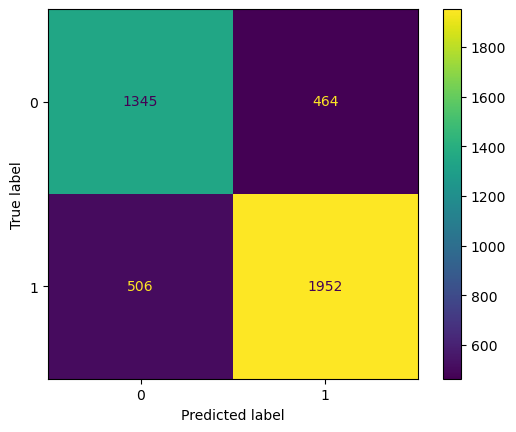

In [48]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

From the confusion matrix, it can be said that:

- The top-left cell (1345) represents the count of true negatives (TN). It means that the model correctly predicted 1345 instances as negative (class 0).
- The top-right cell (464) represents the count of false positives (FP). It means that the model incorrectly predicted 464 instances as positive (class 1) when they were actually negative (class 0).
- The bottom-left cell (506) represents the count of false negatives (FN). It means that the model incorrectly predicted 506 instances as negative (class 0) when they were actually positive (class 1).
- The bottom-right cell (1952) represents the count of true positives (TP). It means that the model correctly predicted 1952 instances as positive (class 1).

In [50]:
# Classification report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1809
           1       0.81      0.79      0.80      2458

    accuracy                           0.77      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.77      0.77      0.77      4267



Precision for Class 0 (Negative Class): 0.73
- This indicates that out of all instances predicted as negative, 73% were actually negative.
 
Precision for Class 1 (Positive Class): 0.81
- This indicates that out of all instances predicted as positive, 81% were actually positive.
 
Recall for Class 0 (Negative Class): 0.74
- This indicates that out of all actual negative instances, 74% were correctly predicted as negative.
 
Recall for Class 1 (Positive Class): 0.79
- This indicates that out of all actual positive instances, 79% were correctly predicted as positive.

The precision and recall scores for the positive class (Class 1) are higher than for the negative class (Class 0). This suggests that the model performs better at identifying positive instances.

For Class 1, the precision is relatively high (0.81), meaning that when the model predicts a positive instance, it is likely to be correct.

The recall for Class 1 is also high (0.79), indicating that the model is good at identifying most of the actual positive instances.

### Adding a new feature and checking the performance

Based on the dataset, a new feature `Review_sentiment` will be created which is subtraction of `Review_Total_Positive_Word_Counts` and `Review_Total_Negative_Word_Counts`. If the value is positive, then it suggests that the sentiment is more towards positive and vice versa. I think this can improve the accuracy of the model, since the model can learn to differentiate between positive and negative reviews more accurately.

In [51]:
# Calculate the Review_Sentiment feature
X_train['Review_Sentiment'] = X_train['Review_Total_Positive_Word_Counts'] - X_train['Review_Total_Negative_Word_Counts']

### Gridsearch

In [52]:
# Creating sample from dataset
X_sample, X_remainder, y_sample, y_remainder = \
    train_test_split(X_train, y_train, test_size = 0.7, stratify=y_train,random_state=1)

In [53]:
# Create placeholders for all three steps
estimators = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=0.8)), 
    ('model', LogisticRegression(solver='liblinear', max_iter=500))
]

my_pipe = Pipeline(estimators)

In [54]:
param_grid = [
    {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2']
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5)

fittedgrid = grid.fit(X_sample, y_sample)

In [55]:
# Best parameters found
fittedgrid.best_params_

{'model__C': 0.001, 'model__penalty': 'l2'}

In [56]:
X_test['Review_Sentiment'] = X_test['Review_Total_Positive_Word_Counts'] - X_test['Review_Total_Negative_Word_Counts']

In [57]:
# Get the best model from GridSearchCV
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.7717365830794469


Despite expected, the performance of the model has not increased.

In [59]:
# Generate the confusion matrix for the best model on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1342  467]
 [ 507 1951]]


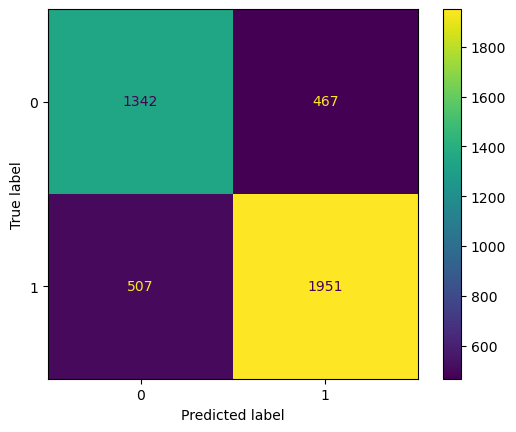

In [60]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [61]:
# Classification report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1809
           1       0.81      0.79      0.80      2458

    accuracy                           0.77      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.77      0.77      0.77      4267



Moreover, the precision and recall haven't changed either.